In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [61]:
munro = pd.read_csv('datasets/clean.csv')
munro.head()

,name,altitude,ascent_count,rating,region,report_count,rating_count,bb_count,hotel_count,hostel_count,...,neighbor_count_10,neighbor_count_15,neighbor_count_20,nearest_city_dist,nearest_city_population,nearest_large_city_dist,population_25,population_50,population_75,population_100
0,Ben Nevis,1345,17902,3.84,Fort William,316,253,72,41,18,...,16,20,29,6.68,10459,89.19,10459,10459,19034,242223
1,Ben Macdui,1309,10449,3.78,Cairngorms,215,162,37,29,9,...,14,17,20,56.26,70000,56.26,0,0,158093,762982
2,Braeriach,1296,6035,3.95,Cairngorms,141,94,37,29,9,...,12,16,20,53.49,70000,53.49,0,0,150894,762982
3,Cairn Toul,1291,5121,3.86,Cairngorms,136,83,37,29,9,...,14,18,21,56.30,70000,56.30,0,0,205053,771982
4,Sgor an Lochain Uaine,1258,4832,3.83,Cairngorms,139,79,37,29,9,...,13,18,20,55.43,70000,55.43,0,0,158093,771982


In [62]:
index = (list(range(1,3))+list(range(6,12)))
munro_subset = munro.iloc[:,index]
munro_subset

,altitude,ascent_count,rating_count,bb_count,hotel_count,hostel_count,cottage_count,camping_count
0,1345,17902,253,72,41,18,147,147
1,1309,10449,162,37,29,9,182,182
2,1296,6035,94,37,29,9,182,182
3,1291,5121,83,37,29,9,182,182
4,1258,4832,79,37,29,9,182,182
...,...,...,...,...,...,...,...,...
277,917,11179,173,37,29,9,182,182
278,917,7474,101,37,29,9,182,182
279,916,6689,101,58,67,6,101,101
280,915,3747,61,72,41,18,147,147


In [63]:
munro_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   altitude       282 non-null    int64
 1   ascent_count   282 non-null    int64
 2   rating_count   282 non-null    int64
 3   bb_count       282 non-null    int64
 4   hotel_count    282 non-null    int64
 5   hostel_count   282 non-null    int64
 6   cottage_count  282 non-null    int64
 7   camping_count  282 non-null    int64
dtypes: int64(8)
memory usage: 17.8 KB


In [71]:
scaler = StandardScaler()
scaled_munro = pd.DataFrame(scaler.fit_transform(munro_subset), index = munro_subset.index, columns = munro_subset.columns)

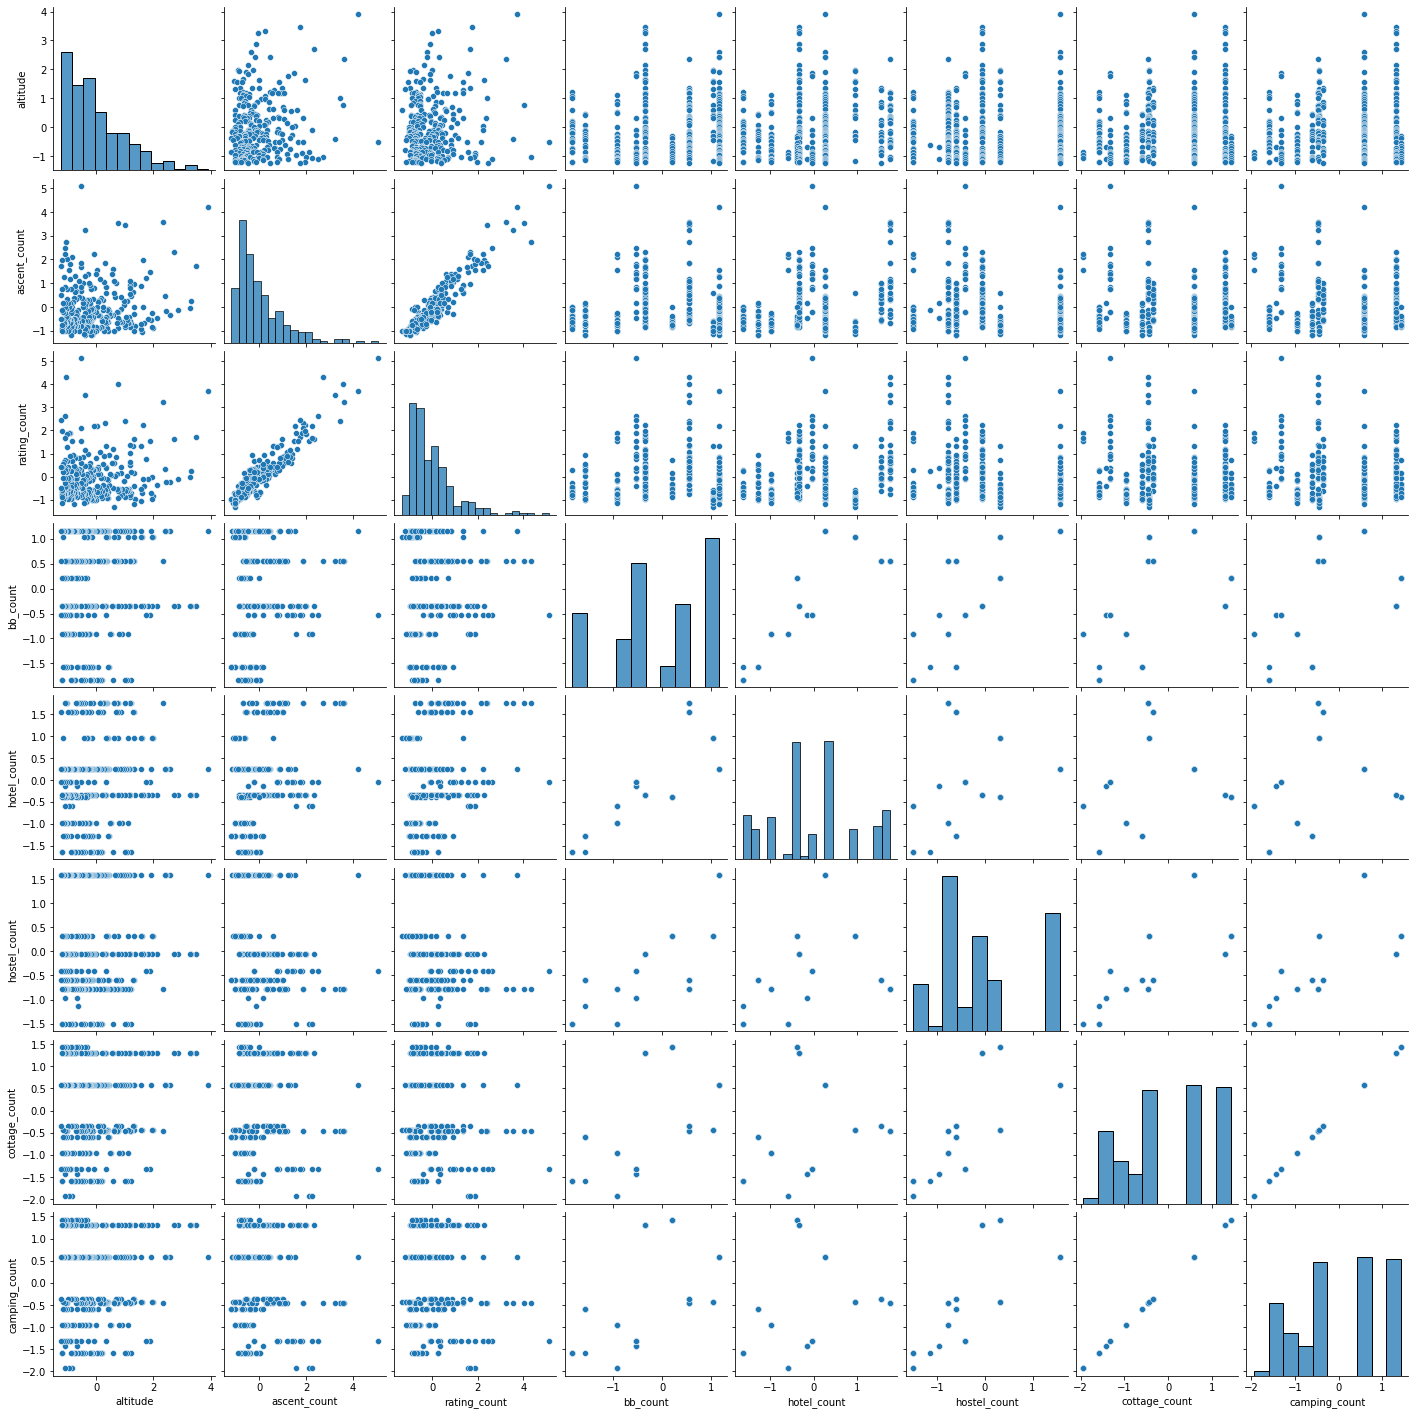

In [72]:
sns.pairplot(scaled_munro)

PC1 explains 41% of the variance.
PC2 explains 27% of the variance.
PC3 explains 15% of the variance.
PC4 explains 11% of the variance.
PC5 explains 5% of the variance.
PC6 explains 1% of the variance.
PC7 explains 0% of the variance.
PC8 explains 0% of the variance.


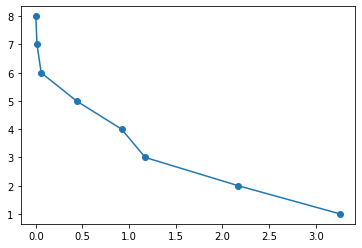

In [74]:
pca = PCA(n_components = len(scaled_munro.columns)).fit(scaled_munro)
# eigenvalues
eigenvalue = (pca.explained_variance_)
plt.plot(eigenvalue, list(range(1, len(eigenvalue)+1)), '-o')
# eigenvectors
# print(pca.components_)
for i in range(len(eigenvalue)):
    print('PC' + str(i+1) + ' explains ' + str(round((eigenvalue[i] / np.sum(eigenvalue))*100)) + '% of the variance.')

[[-2.71696534e+00  5.39175462e+00  2.15134595e+00 ... -2.54243303e-01
   1.22450576e-01 -3.64326860e-16]
 [-1.54909050e+00  2.21817031e+00  2.86186110e+00 ...  5.27882026e-02
   4.20653399e-02 -3.36010440e-16]
 [-1.44989197e+00  3.09774335e-01  2.18396072e+00 ...  3.92395604e-02
  -1.44482183e-02 -2.24988138e-16]
 ...
 [ 4.64886900e-02  1.12255756e+00 -1.40310737e+00 ... -9.37973253e-02
  -4.10831325e-02 -1.60248305e-16]
 [-1.71014527e+00 -9.88328606e-01 -7.92735231e-01 ...  1.44605119e-03
  -2.18417237e-02  3.01806955e-16]
 [ 1.78081460e+00  2.85163891e+00 -1.02110223e-01 ...  4.96143926e-01
  -1.00669384e-01  3.00409402e-16]]


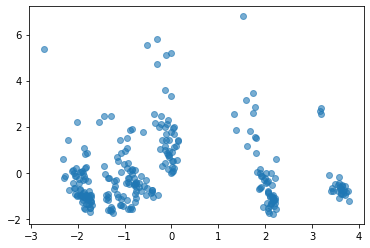

In [88]:
pca_result = pca.transform(scaled_munro)
print(pca_result)
plt.scatter(pca_result[:,0], pca_result[:,1], alpha=0.6)

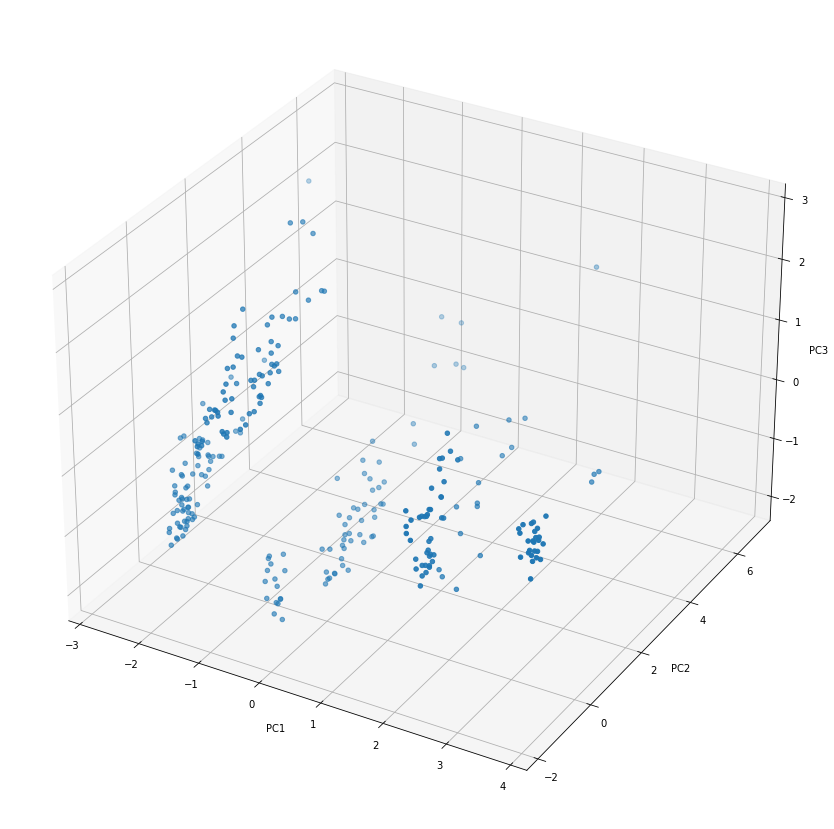

In [68]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_result[:,0], pca_result[:,1], pca_result[:,2])

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()

<AxesSubplot:>

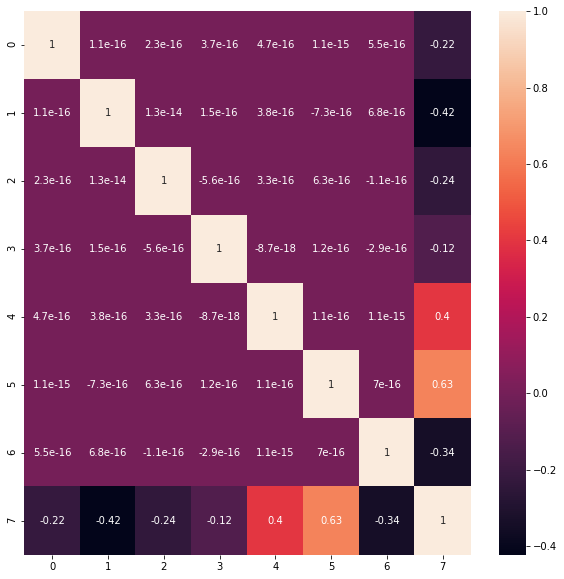

In [85]:
pca_data = pd.DataFrame(data=pca_result)
plt.figure(figsize=(10,10))
sns.heatmap(pca_data.corr(),annot=True)